<a href="https://colab.research.google.com/github/Shanzayousaf/classification-and-regression/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown
import gdown

In [ ]:
dataset = '1UOs7OhCSluLMwmbdp0BIUQYAotbwBpe3'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1UOs7OhCSluLMwmbdp0BIUQYAotbwBpe3
To: /dataset.csv
100%|██████████| 24.7M/24.7M [00:00<00:00, 31.8MB/s]


'/dataset.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(output_path)
df.dtypes

,0
Unnamed: 0,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


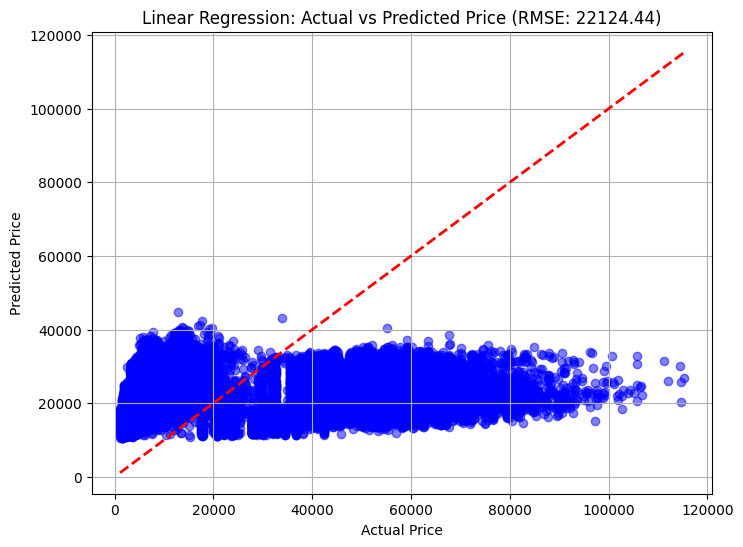

22124.44136518279

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Selecting relevant features and the target
X = df[['duration', 'days_left']]
y = df['price']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the accuracy using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Plotting the actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression: Actual vs Predicted Price (RMSE: {rmse:.2f})')
plt.grid(True)
plt.show()

rmse


RMSE: 4823.53651774441
R^2: 0.9548645885009172


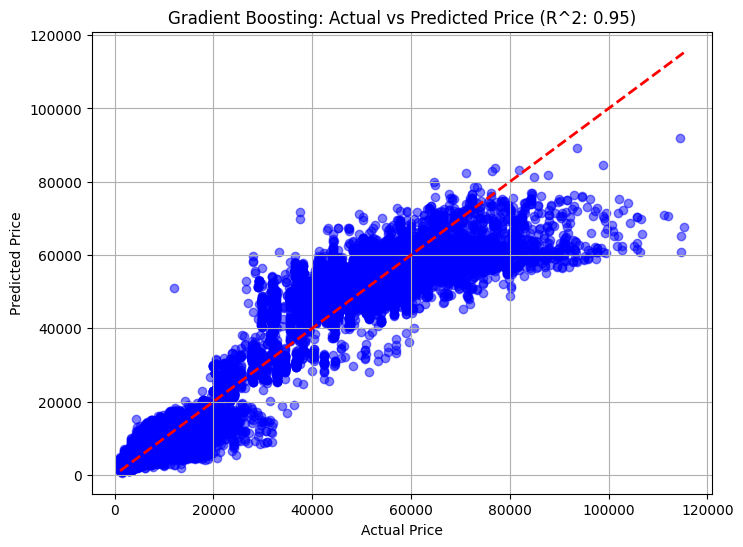

RMSE: 4823.53651774441
R^2: 0.9548645885009172


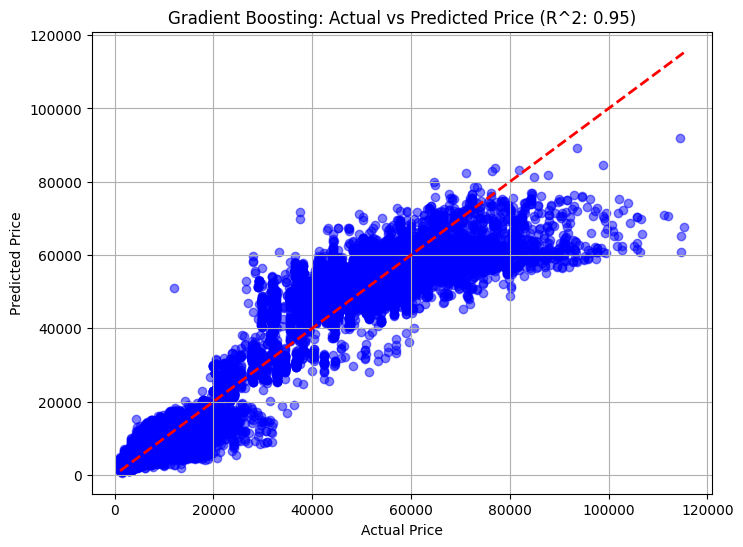

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Identifying categorical and numerical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical_cols = ['duration', 'days_left']

# Features and target
X = df[categorical_cols + numerical_cols]
y = df['price']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Applying Gradient Boosting Regressor
gbr_model = make_pipeline(preprocessor, GradientBoostingRegressor(n_estimators=200, random_state=42))
gbr_model.fit(X_train, y_train)

# Making predictions
y_pred = gbr_model.predict(X_test)

# Calculate RMSE and R^2
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Plotting the actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Gradient Boosting: Actual vs Predicted Price (R^2: {r2:.2f})')
plt.grid(True)
plt.show()


In [ ]:
#


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:54] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.


XGBoost RMSE: 4099.11893600859
XGBoost R^2: 0.967403769493103


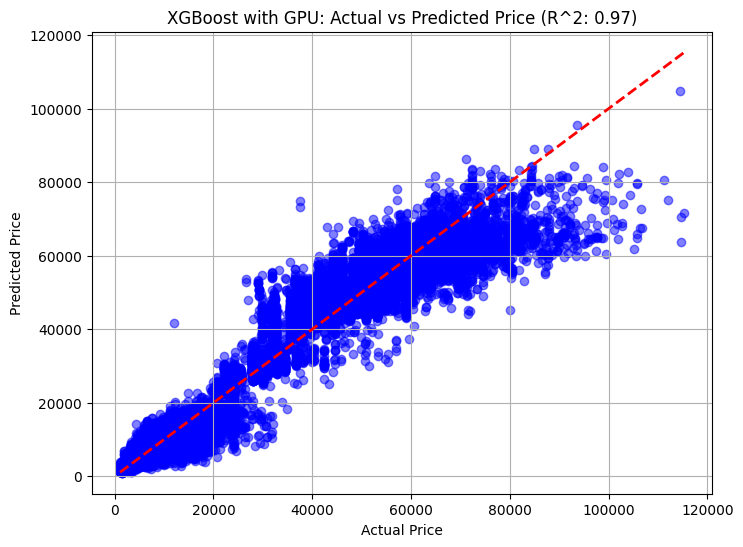

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset if not already loaded
# df = pd.read_csv('/path_to_your_file.csv')

# Identifying categorical and numerical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical_cols = ['duration', 'days_left']

# Features and target
X = df[categorical_cols + numerical_cols]
y = df['price']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Applying XGBoost with GPU support
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, tree_method='gpu_hist')
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE and R^2
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'XGBoost RMSE: {rmse}')
print(f'XGBoost R^2: {r2}')

# Plotting the actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'XGBoost with GPU: Actual vs Predicted Price (R^2: {r2:.2f})')
plt.grid(True)
plt.show()


LOGISTIC REGRESSION

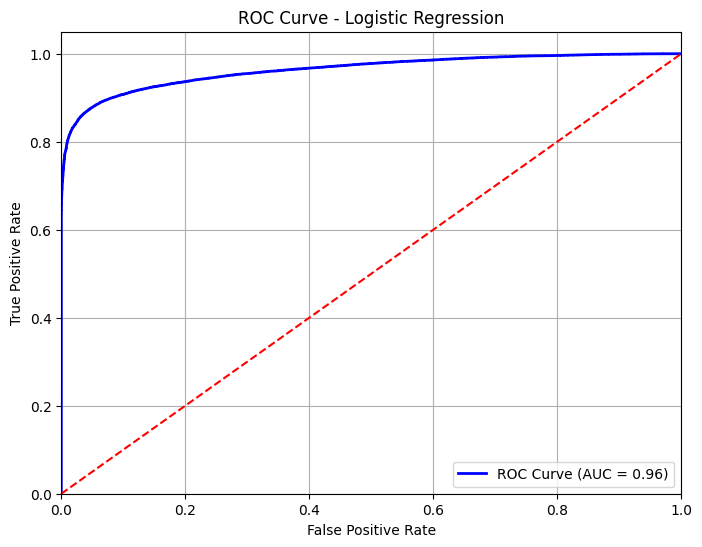

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import pandas as pd

# Load the dataset (assuming df is already loaded as it was mentioned earlier)
# Reusing the dataset for consistency with previous code
# df = pd.read_csv('/mnt/data/Clean_Dataset.csv')  # If the file needs to be loaded again

# Features and target
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
numerical_cols = ['duration', 'days_left']

X = df[categorical_cols + numerical_cols]
y = df['price']  # Assuming binary classification for ROC purposes

# Convert price to binary classification for ROC (1 for prices above median, 0 for below or equal)
y_binary = (y > y.median()).astype(int)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Logistic Regression model
logreg = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
logreg.fit(X_train, y_train)

# Predicting probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:57:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


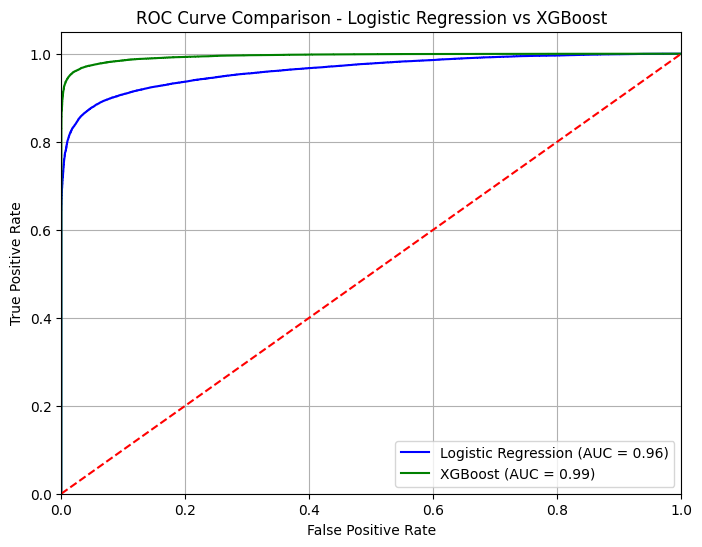

({'logisticregression__C': 10,
  'logisticregression__max_iter': 100,
  'logisticregression__penalty': 'l2',
  'logisticregression__solver': 'lbfgs'},
 {'xgbclassifier__learning_rate': 0.2,
  'xgbclassifier__max_depth': 7,
  'xgbclassifier__n_estimators': 200,
  'xgbclassifier__subsample': 0.8})

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression hyperparameters
logreg_params = {
    'logisticregression__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logisticregression__penalty': ['l2'],         # Type of regularization
    'logisticregression__solver': ['lbfgs'],       # Solver for optimization
    'logisticregression__max_iter': [100, 500, 1000]  # Number of iterations
}

# XGBoost hyperparameters
xgb_params = {
    'xgbclassifier__n_estimators': [100, 200],  # Add 'xgbclassifier__' prefix
    'xgbclassifier__max_depth': [3, 5, 7],      # Add 'xgbclassifier__' prefix
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],  # Add 'xgbclassifier__' prefix
    'xgbclassifier__subsample': [0.8, 1.0]
}

# Logistic Regression model pipeline
logreg_pipe = make_pipeline(preprocessor, LogisticRegression())

# XGBoost model pipeline
xgb_pipe = make_pipeline(preprocessor, XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# GridSearch for Logistic Regression
logreg_grid = GridSearchCV(logreg_pipe, logreg_params, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

# GridSearch for XGBoost
xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=5, scoring='roc_auc', n_jobs=-1)  # Use the XGBoost pipeline
xgb_grid.fit(X_train, y_train)

# Best Logistic Regression model
best_logreg = logreg_grid.best_estimator_
logreg_best_params = logreg_grid.best_params_

# Best XGBoost model
best_xgb = xgb_grid.best_estimator_
xgb_best_params = xgb_grid.best_params_

# Evaluating performance on the test set
logreg_pred_prob = best_logreg.predict_proba(X_test)[:, 1]
xgb_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# Calculating ROC curves
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_prob)

logreg_auc = auc(logreg_fpr, logreg_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plotting ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logistic Regression (AUC = {logreg_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Logistic Regression vs XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

logreg_best_params, xgb_best_params
